In [15]:
from preamble import *
%matplotlib inline

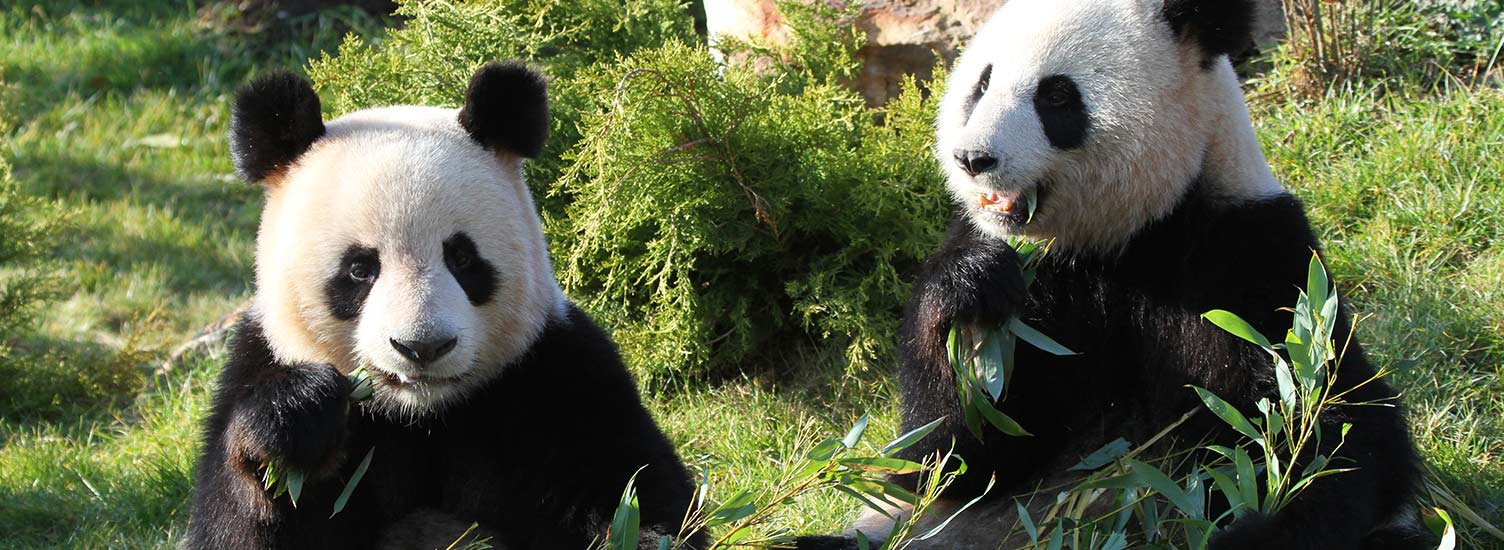

**Recap**

- Loaded Red wine and White wine data
  - shape
    - `.shape`
  - head
    - `.head()`
  - indexing 
    - `.loc`, `.iloc`, `.ix`
  - columns
    - `.columns`, `.index`
  - column subset 
    - `[[]]`
  - summary statistics
    - `.describe()`
  - data types
    - `.dtypes`
  - feature/ attribute, instance
- Selecting data based on attribute values
  - Select red wines with volatile acidity > 1.1
- Assigned quality label: low, medium, high based on numeric quality attribute

In [2]:
def quality_label(value):
  if value <= 5:
    return 'low'
  elif value <= 7:
    return 'medium'
  return 'high'

In [3]:
import pandas as pd
red_df = pd.read_csv('data/winequality/winequality-red.csv', sep=';')
white_df = pd.read_csv('data/winequality/winequality-white.csv', sep=';')
red_df.columns = ['_'.join(c.split()).lower() for c in red_df.columns]
white_df.columns = ['_'.join(c.split()).lower() for c in white_df.columns]
red_df['colour'] = 'red'
white_df['colour'] = 'white'
red_df['quality_label'] = red_df.quality.apply(quality_label)
white_df['quality_label'] = white_df.quality.apply(quality_label)

In [4]:
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,colour,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [5]:
red_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'colour', 'quality_label'],
      dtype='object')

# Exploring Data with Pandas (Contd...)

## Arithmetic Operations

### Using python arithmetic operators

Arithmetic operations can be performed with scalars as shown below where a value of 3 is added to each element in the alcohol column of red_df:

In [6]:
red_df.alcohol.head()

0    9.4
1    9.8
2    9.8
3    9.8
4    9.4
Name: alcohol, dtype: float64

In [7]:
extra_strong = red_df.alcohol + 3
extra_strong.head()

0    12.4
1    12.8
2    12.8
3    12.8
4    12.4
Name: alcohol, dtype: float64

### Using pandas functions

Pandas supports functions for calculation of mean, median, standard deviation, min, max, etc. on it's data structures.

Mean alcohol content in white_df is calculated as shown below:

In [8]:
white_df.alcohol.mean()

10.514267047774602

In [9]:
white_df.alcohol.std()

1.230620567757318

Min alcohol content in white_df

In [10]:
white_df.alcohol.min()

8.0

Max alcohol content in white_df

In [11]:
white_df.alcohol.max()

14.2

**Standardization** is the process of transforming different variables to a common scale. The output of standardization is called the **standard score** or **z-score**. The equation to calculate the standard score ($z$) of an attribute $x$ is:

$$ z = \frac{x - \overline{x}}{S} $$

where:
- $\overline{x}$ is the mean value of $x$
- $S$ is the standard deviation of $x$

> Calculate the standard scores for the alcohol attribute in red_df and assign it to red_alcohol_z

In [12]:
mean = red_df.alcohol.mean()
std = red_df.alcohol.std()
red_alcohol_z = (red_df.alcohol - mean) / std

In [13]:
# prints the top values in the z-score
red_alcohol_z.head()

0   -0.959946
1   -0.584594
2   -0.584594
3   -0.584594
4   -0.959946
Name: alcohol, dtype: float64

> Now plot the distribution of alcohol values of red_df before and after standardization using the code provided below

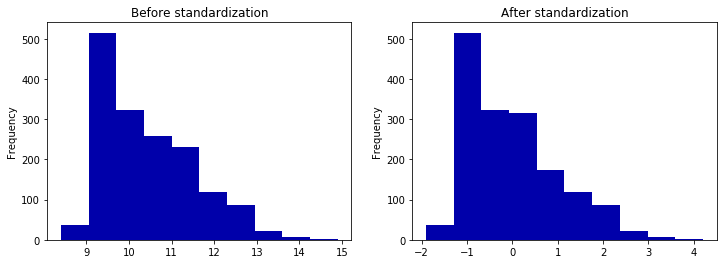

In [16]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].set_title('Before standardization')
ax[1].set_title('After standardization')
red_df.alcohol.plot.hist(ax=ax[0])
red_alcohol_z.plot.hist(ax=ax[1])

> What is the mean and standard deviation of the z-score? What does it indicate?

## Groupby

Pandas supports ``` groupby ``` and ``` agg ``` functions to group by attributes of a dataframe and aggregate based on an aggregation function.

### Simple aggregation functions

Some example operations are performed on a test dataframe shown below:

In [17]:
col12_df = pd.DataFrame.from_dict({'col1': ['A', 'A', 'B', 'B', 'B'], 'col2': [2, 3, 1, 3, 5]})
col12_df

,col1,col2
0,A,2
1,A,3
2,B,1
3,B,3
4,B,5


Grouping by col1 and counting rows:

In [18]:
col1_count_df = col12_df.groupby('col1').agg('count')
col1_count_df

,col2
col1,
A,2
B,3


Grouping by col1 and summing the values of other columns:

In [19]:
col1_sum_df = col12_df.groupby('col1').agg('sum')
col1_sum_df

,col2
col1,
A,5
B,9


Grouping by col1 and finding the count and mean of other columns:

In [24]:
col1_count_mean_df = col12_df.groupby('col1').agg(['count', 'mean'])
col1_count_mean_df

col2     
     count mean
col1           
A        2  2.5
B        3  3.0

> Find the mean value of 'total_sulfur_dioxide' based on the quality label of red wine and assign the output to red_mean_so2_by_quality

In [21]:
red_mean_so2_by_quality = red_df.groupby('quality_label').total_sulfur_dioxide.agg('mean')
red_mean_so2_by_quality

quality_label
high      33.44
low       54.65
medium    39.48
Name: total_sulfur_dioxide, dtype: float64

### Indexes for grouped DataFrames

> What is the index of red_mean_so2_by_quality?

The index of a dataframe can be reset to continuous integers using the `.reset_index()` function as shown below:

In [22]:
col1_count_df.reset_index()

,col1,col2
0,A,2
1,B,3


> Reset index of red_mean_so2_by_quality and assign it back to red_mean_so2_by_quality

> Find white_mean_so2_by_quality in the same way as shown above for white_df

In [23]:
white_mean_so2_by_quality = white_df.groupby('quality_label').total_sulfur_dioxide.agg('mean')
white_mean_so2_by_quality

quality_label
high      125.88
low       148.60
medium    133.64
Name: total_sulfur_dioxide, dtype: float64

> What happens when you reset index for `col1_count_mean_df`?

In [25]:
col1_count_mean_df.reset_index()

col1  col2     
       count mean
0    A     2  2.5
1    B     3  3.0

## Combining DataFrames

### Merge

The ``` pd.merge() ``` function is used to join two dataframes similar to SQL joins

In [51]:
col13_df = pd.DataFrame.from_dict({'col1': ['A', 'B'], 'col3': ['p', 'q']})
col13_df

,col1,col3
0,A,p
1,B,q


In [53]:
col123_df = pd.merge(col12_df, col13_df, on='col1')
col123_df

,col1,col2,col3
0,A,2,p
1,A,3,p
2,B,1,q
3,B,3,q
4,B,5,q


> Merge red_mean_so2_by_quality and white_mean_so2_by_quality on the quality_label

> What do you observe in the column names?

### Concat

The ``` pd.concat() ``` function is used to concatenate two dataframes columnwise or rowwise

#### Columwise:

In [26]:
col45_df = pd.DataFrame.from_dict({'col4': ['u', 'v', 'w', 'v', 'u'], 'col5': [1.93, 23.4, 4.56, 2.87, 6.12]})
col45_df

,col4,col5
0,u,1.93
1,v,23.40
2,w,4.56
3,v,2.87
4,u,6.12


In [29]:
pd.concat([col12_df, col45_df], axis=1)

,col1,col2,col4,col5
0,A,2,u,1.93
1,A,3,v,23.40
2,B,1,w,4.56
3,B,3,v,2.87
4,B,5,u,6.12


If we intend to label the columns to indicate the source dataframes, we can create a multilevel column header with the keys argument:

In [30]:
pd.concat([col12_df, col45_df], axis=1, keys=['file1', 'file2'])

file1      file2       
   col1 col2  col4   col5
0     A    2     u   1.93
1     A    3     v  23.40
2     B    1     w   4.56
3     B    3     v   2.87
4     B    5     u   6.12

In [31]:
subset_cols = ['residual_sugar', 'total_sulfur_dioxide', 'fixed_acidity', 'alcohol'] 

> Select `subset_cols` from red_df and white_df into red_subset_df and white_subset_df

In [32]:
red_df[subset_cols]

,residual_sugar,total_sulfur_dioxide,fixed_acidity,alcohol
0,1.9,34.0,7.4,9.4
1,2.6,67.0,7.8,9.8
2,2.3,54.0,7.8,9.8
3,1.9,60.0,11.2,9.8
4,1.9,34.0,7.4,9.4
5,1.8,40.0,7.4,9.4
6,1.6,59.0,7.9,9.4
7,1.2,21.0,7.3,10.0
8,2.0,18.0,7.8,9.5
9,6.1,102.0,7.5,10.5


> Describe and concatenate red_subset_df and white_subset_df and label the corresponding columns as 'Red' and 'White'

#### Rowwise

In [33]:
col12_more_df = pd.DataFrame.from_dict({'col1': ['A', 'C'], 'col2': [9, 11]})
col12_more_df

,col1,col2
0,A,9
1,C,11


In [34]:
pd.concat([col12_df, col12_more_df], axis=0)

,col1,col2
0,A,2
1,A,3
2,B,1
3,B,3
4,B,5
0,A,9
1,C,11


In [35]:
pd.concat([col12_df, col12_more_df], axis=0, ignore_index=True)

,col1,col2
0,A,2
1,A,3
2,B,1
3,B,3
4,B,5
5,A,9
6,C,11


> Concatenate red_df and white_df rowwise into another dataframe called wine_df

## Visualization

Content in this section is inspired by this blog: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

> Import matplotlib and seaborn libraries as shown
```
import matplotlib.pyplot as plt
import seaborn as sns
```

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate analysis

Pandas supports plotting of attributes in a dataframe by using the index as the x-axis by default.

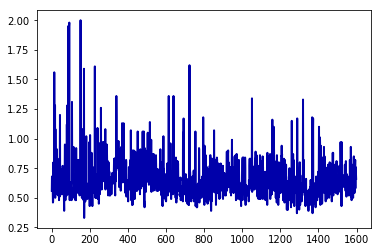

In [76]:
red_df.sulphates.plot()

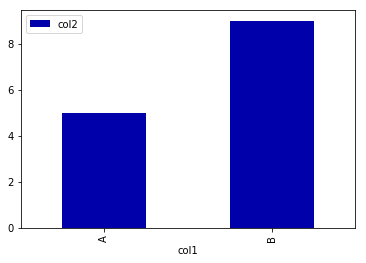

In [80]:
col1_sum_df.plot.bar()

**Histograms**

- Great way to visualize distributions of numeric data

Pandas has a ```hist``` function on dataframe that plots a histogram of all numeric variables

/Users/sumukh/Envs/ml_bootcamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


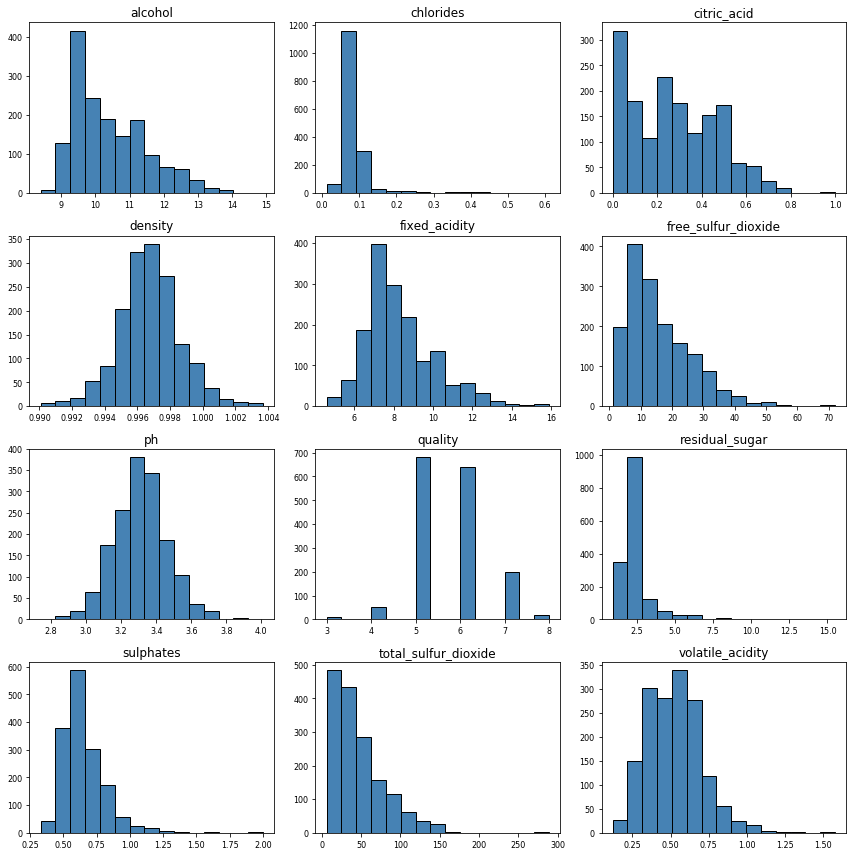

In [70]:
f, ax = plt.subplots(figsize=(10,10))
red_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.show()

### Bivariate analysis

**Heatmap**

Helps identify correlations between variables in a dataset.

Correlation measures the strength of association between two variables and the direction of the relationship. A high positive values indicates a strong correlation that indicates that when one variable is high the other is also likely to be high. A value close to zero indicates no correlation. Negative values indicate that an increase in one variable is liked with a decrease in the other variable.

Pandas contains a method ``` df.corr ``` on Series and DataFrame objects that help us find the correlation using the following correlation algorithms

- pearson (default)
- kendall
- spearman

> Find the correlation between variables in the wines df

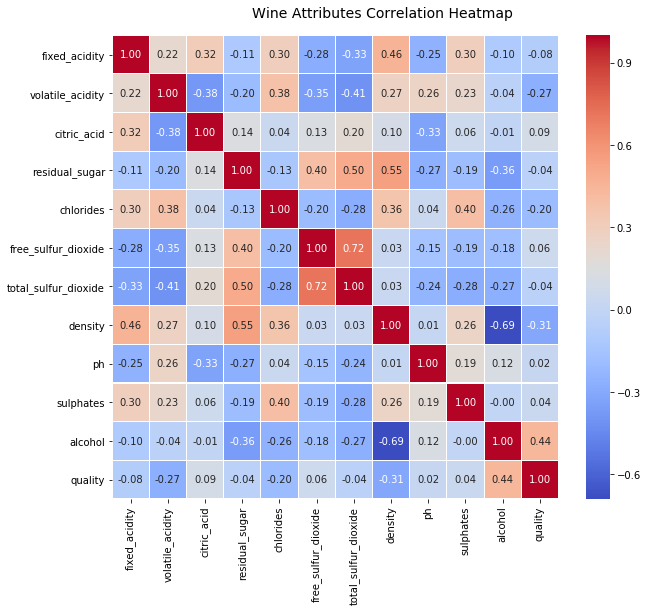

In [74]:
f, ax = plt.subplots(figsize=(10, 8))
corr = wine_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

# Types of Machine Learning Algorithms

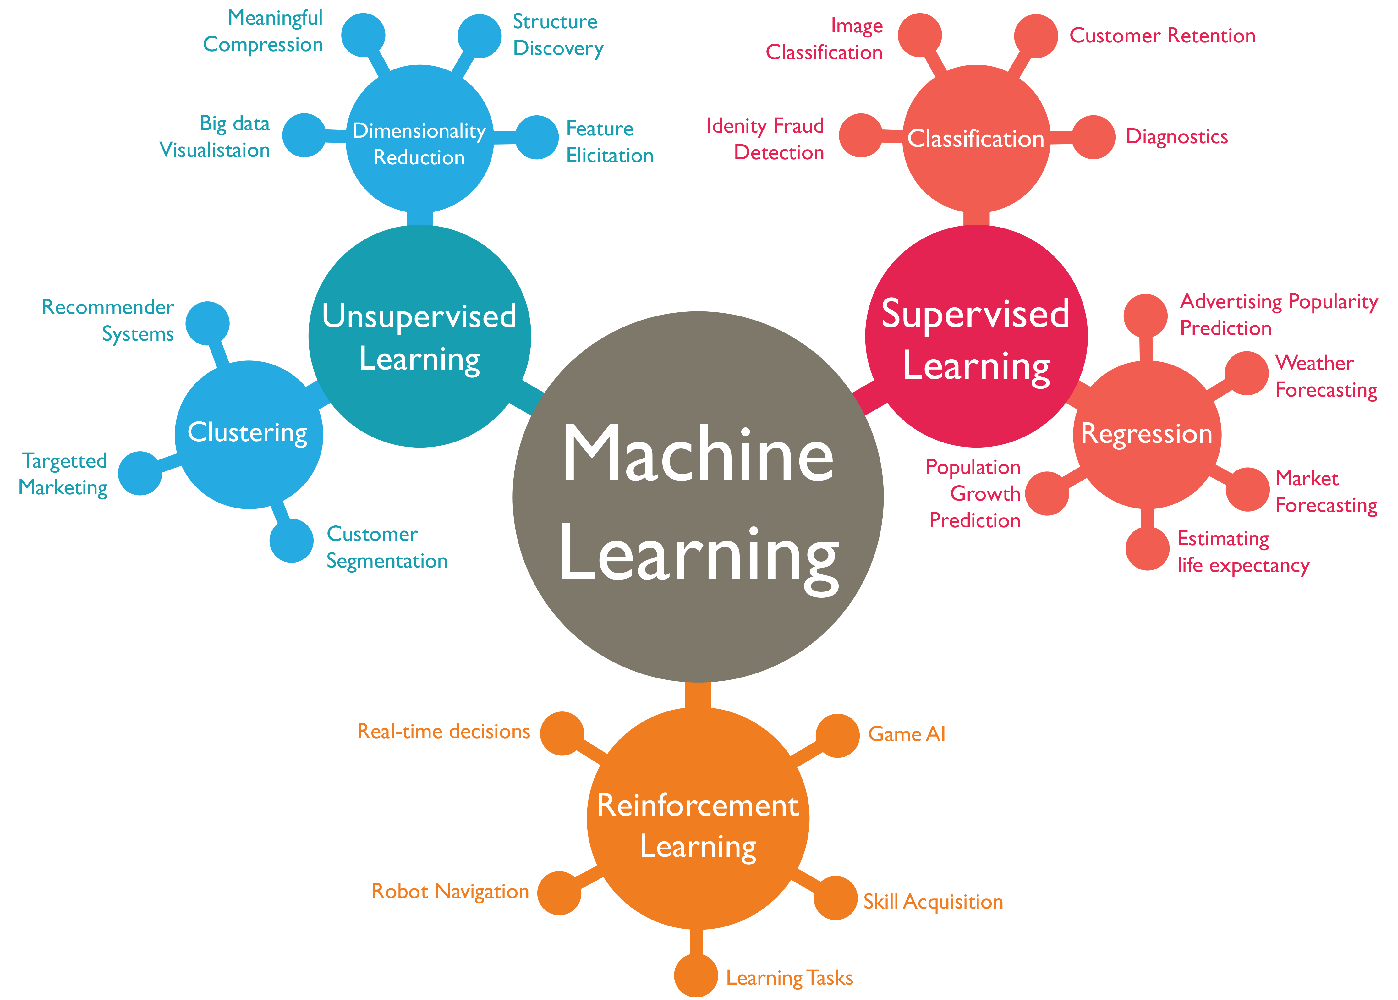